# Use Cases

In this notebook we will walk you through $k$-Motiflets unique ability to learn its parameters from the data to discover meaningful motif sets.

# Load required Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: ECG heartbeats from the LTAF database


The ECG heartbeats datasets contains a patient's (with ID $71$) heartbeat from the LTAF database. It consists of $3.000$ measurements at $128Hz$ corresponding to roughly $~23s$. The heartbeat rate is around $60$ to $80$ bpm. The TS contains two motifs. It starts with $6$ repetitions of a calibration signal, followed by roughly $16$ full heartbeats.

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


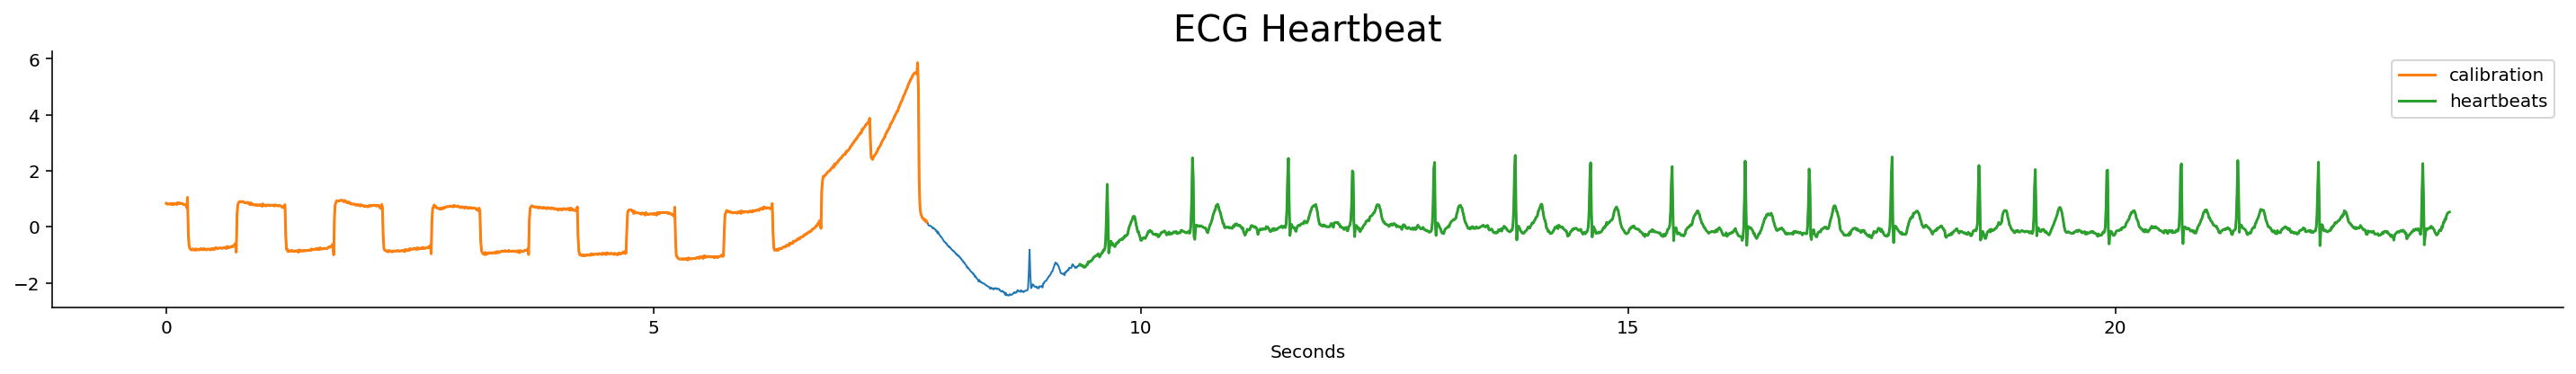

In [2]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(ds_name, series, ground_truth=df_gt)

# Known Motifs

There are two motifs: A calibration signal with $6$ repetitions, and the actual heartbeats with around $16$ occurrences.

## First, we learn the motif length l

We find aminimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 86.96it/s]


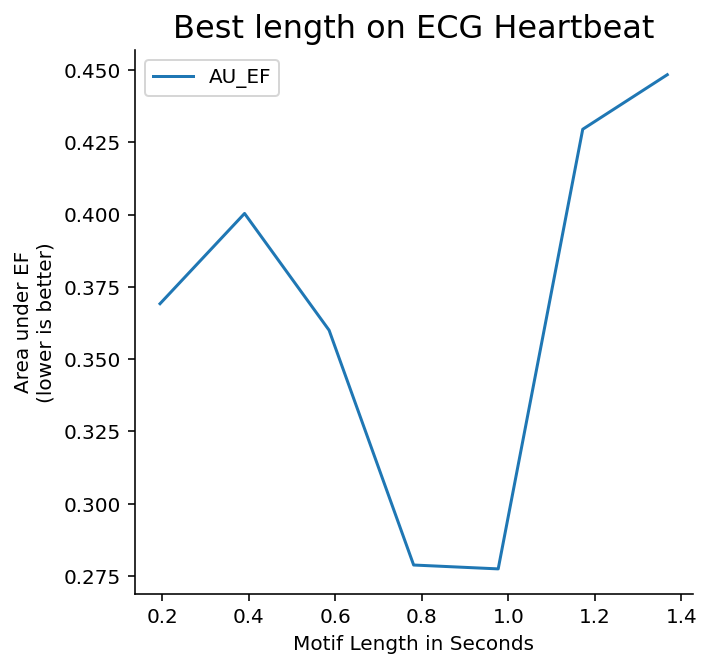

Best motif length 0.9765625 seconds


In [3]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = plot_motif_length_selection(
    ks, series,
    motif_length_range=length_range, ds_name=ds_name)

print ("Best motif length", series.index[motif_length], "seconds")

## Next, we learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 27.32it/s]


Chosen window-size: 125
Elbow Points [ 6 17]


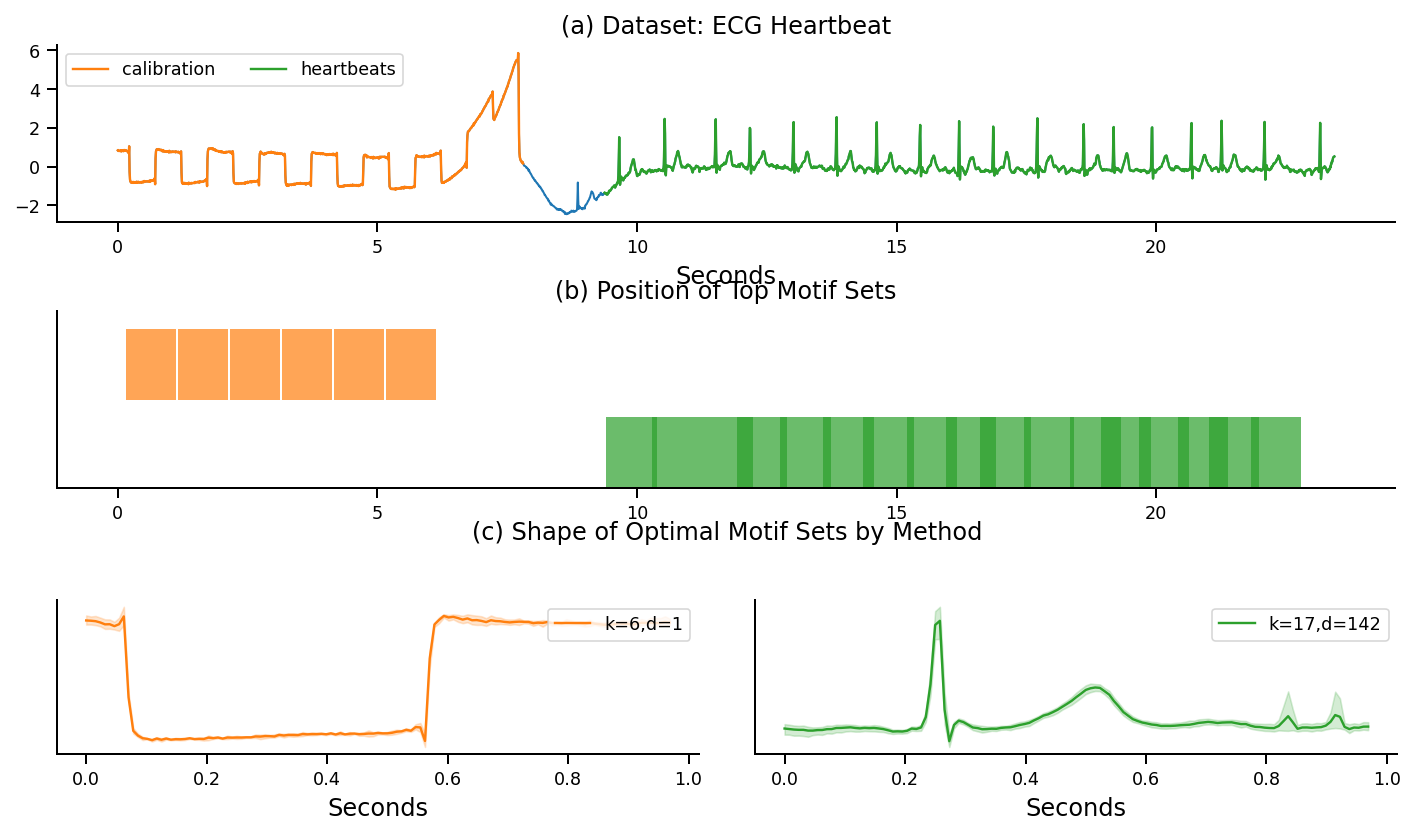

In [4]:
dists, candidates, elbow_points = plot_elbow(
    ks, series,
    ds_name=ds_name, 
    motif_length=motif_length,
    ground_truth=df_gt)

<hr>

# Dataset: Muscle Activation Dataset

The Muscle Activation dataset was collected from professional in-line speed skating on a large motor driven treadmill with Electromyography (EMG) data of multiple movements. It consists of $29.899$ measurements at $100Hz$ corresponding to $30s$ in total. The known motifs are the muscle movement and a recovery phase.

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


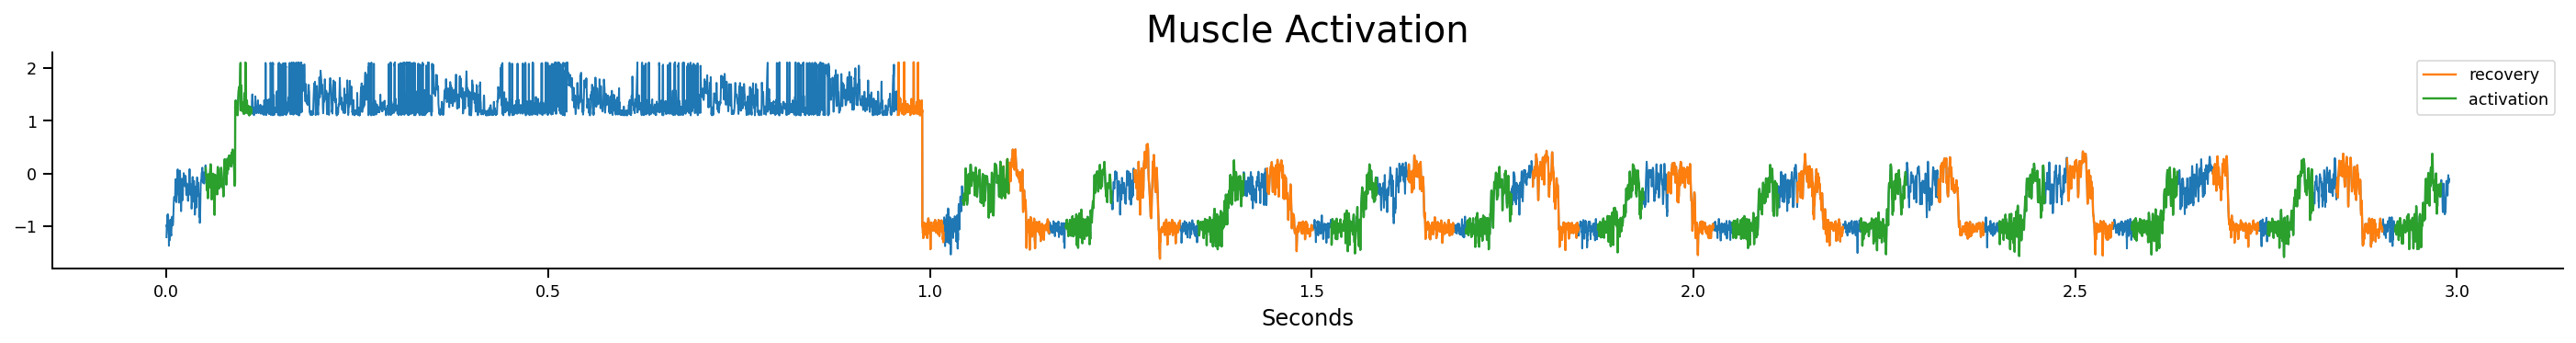

In [5]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"

series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(ds_name, series, ground_truth=df_gt)

# Known Motifs

The known motifs are the muscle movement activation and a recovery phase of the Gluteus Maximus muscle and have $13$ and $12$ occurrences, respectively.

## First, we learn the motif length l

We find a minimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

Compute ks: 100%|████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.69it/s]


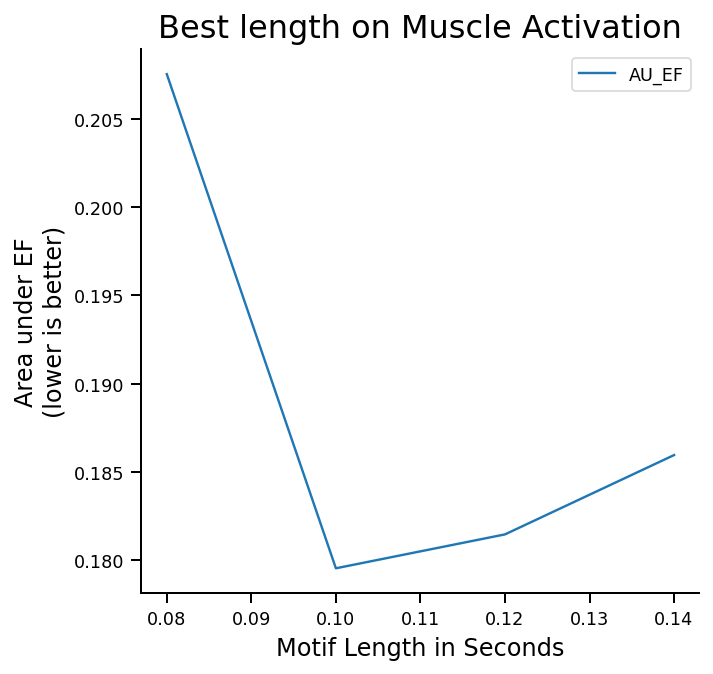

Found motif length 500


In [6]:
k = 15
length_range = np.arange(400,701,100) 

motif_length = plot_motif_length_selection(
    k, series, length_range, ds_name=ds_name)

print ("Found motif length", motif_length)

## Top-1 k-Motiflets

We find the recovery phase with $12$ occurences as TOP-1 motif

Compute ks: 100%|████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.11it/s]


Chosen window-size: 500
Elbow Points [12]


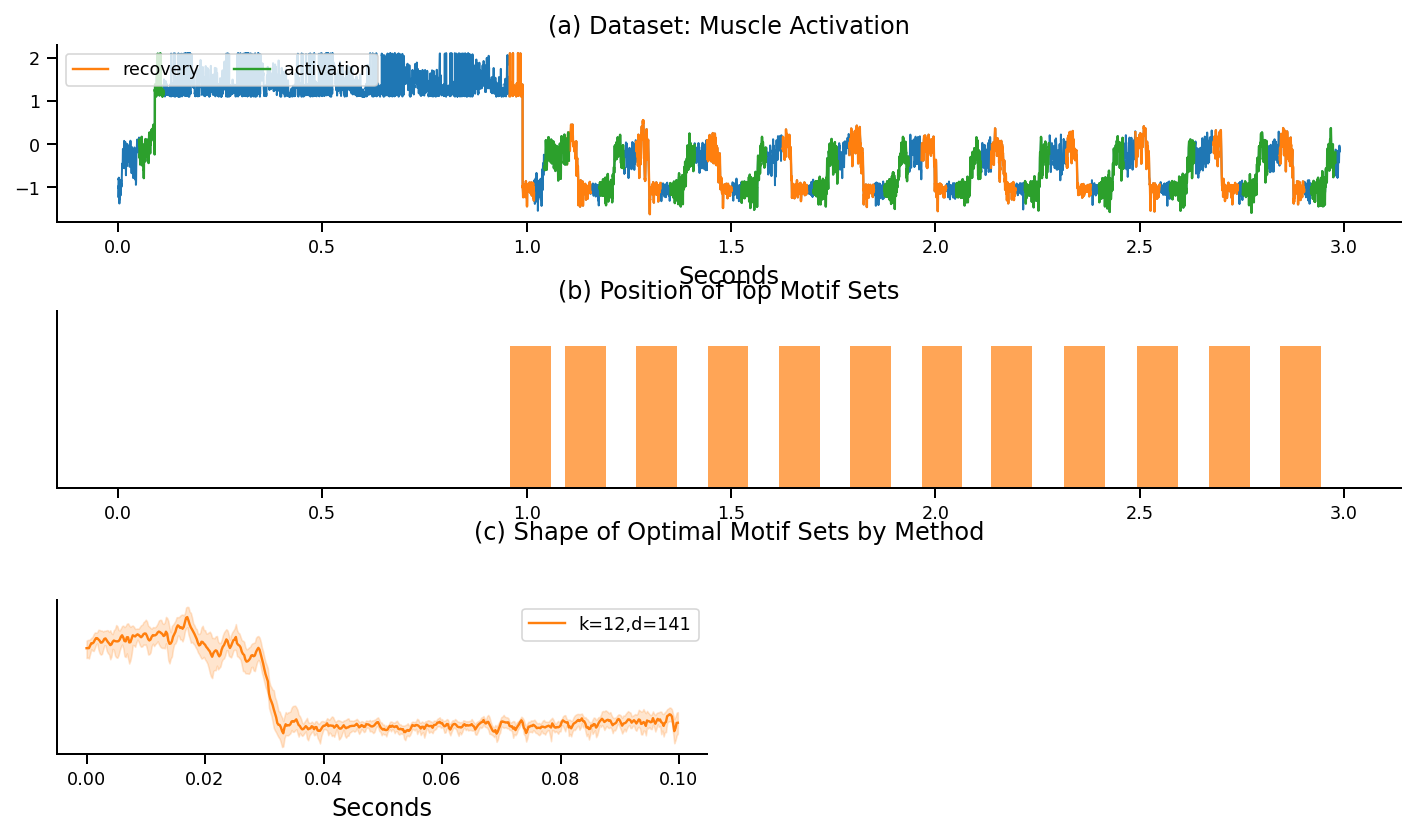

In [7]:
dists, candidates, elbow_points = plot_elbow(
    k, series, ds_name=ds_name,
    motif_length=motif_length, ground_truth=df_gt)

## Top-2 k-Motiflets

We may also find the activation phase with $12$ occurences as TOP-2 motif

Compute ks: 100%|████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.81it/s]


Chosen window-size: 500
Elbow Points [13]


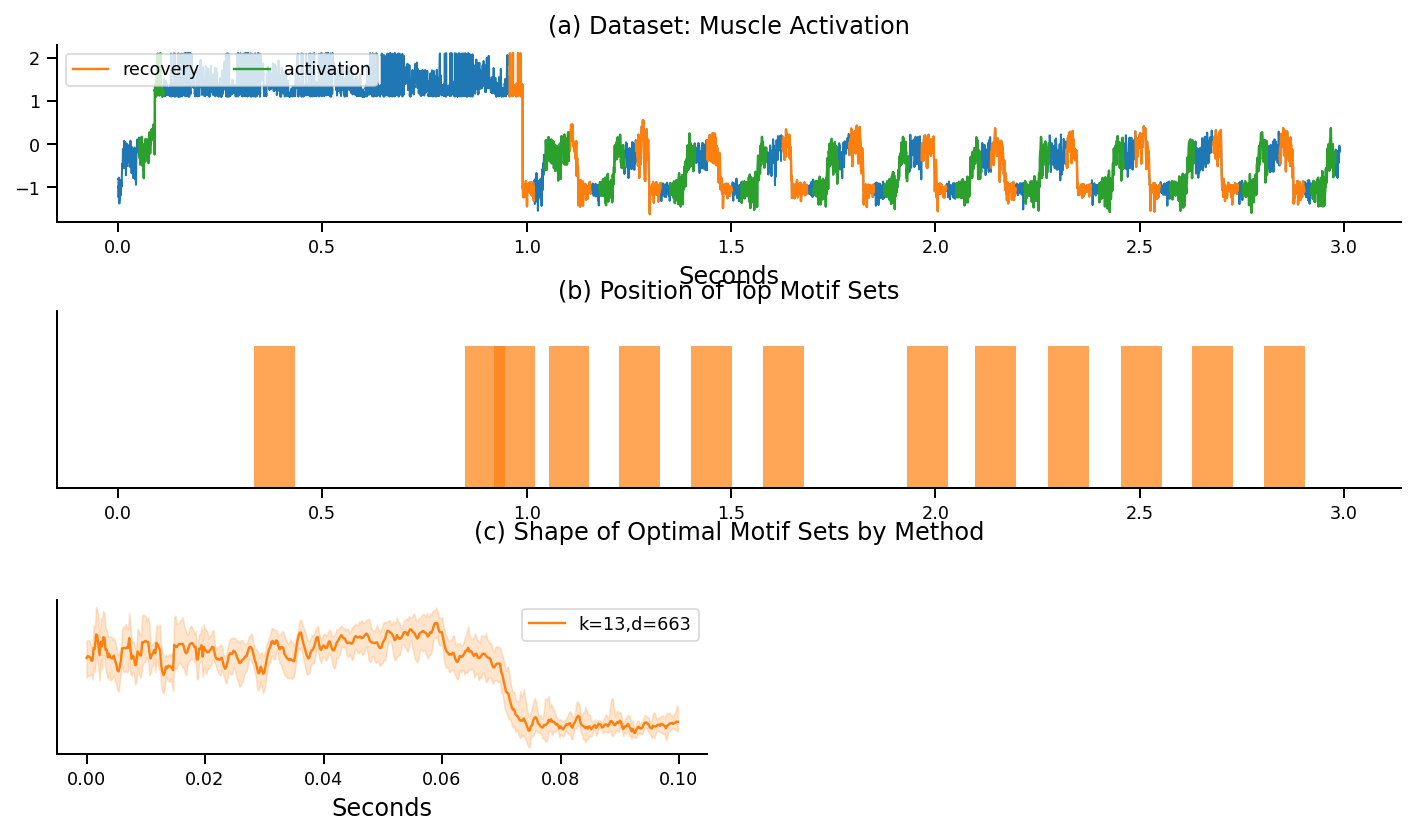

In [8]:
dists2, candidates2, elbow_points2 = plot_elbow(
    k, series, ds_name=ds_name,
    exclusion=candidates, motif_length=motif_length, ground_truth=df_gt)

<hr>

# Dataset: Physiodata - EEG sleep data
    
This Physiodata - EEG sleep dataset contains a recording of an afternoon nap of a healthy, nonsmoking person, between 20 to 40 years old. Data was recorded with an extrathoracic strain belt. The dataset consists of $269.286$ points at $100hz$ corresponding to $45min$. Known motifs are so-called sleep spindles and $k$-complexes.

### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


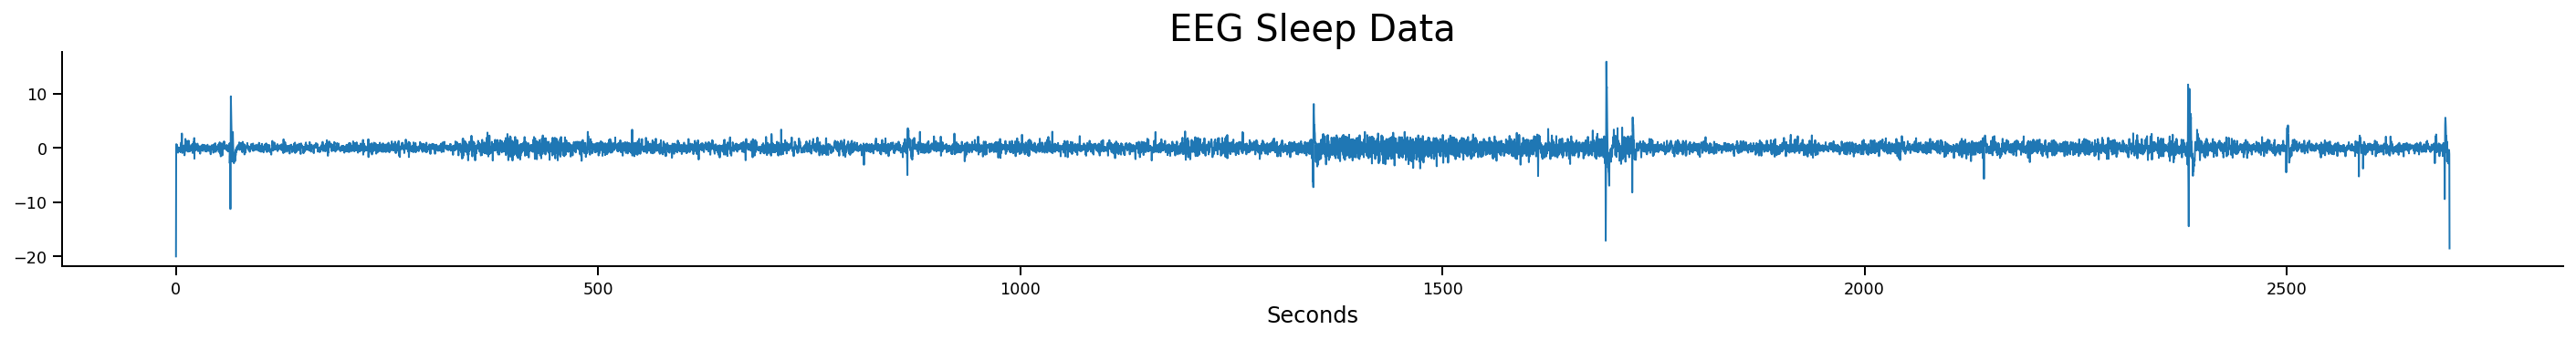

In [9]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = ml.read_dataset_with_index(file)
plot_dataset(ds_name, series)

# Known Motifs in Stage 2 sleep phases


<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Stage2sleep_new.svg">

This data set contains two main motifs: the K-Complex and  sleep spindles, two characteristic markers of stage 2 sleep.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 19.35it/s]


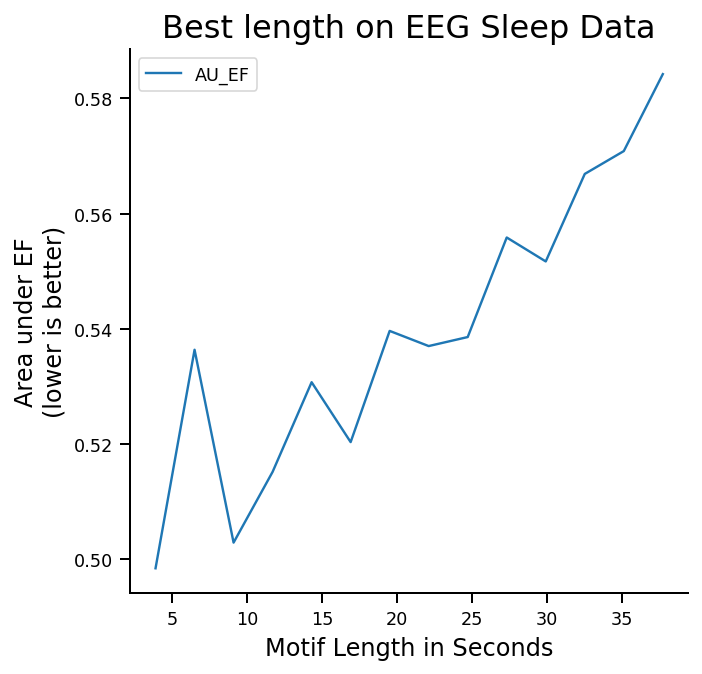

In [10]:
ks = 20

length_range = np.arange(15,151,10)
motif_length = plot_motif_length_selection(
    ks, series, motif_length_range=length_range, ds_name=ds_name)

motif_length=25


The dataset has many minima. We chose $l=25$ in the following, as it is a good value for both interesting motifs.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: 
sleep spindles with k=15 repetitions and K-komplexes with k=13 repetitions.

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.94it/s]


Chosen window-size: 25
Elbow Points [ 7 13 15]


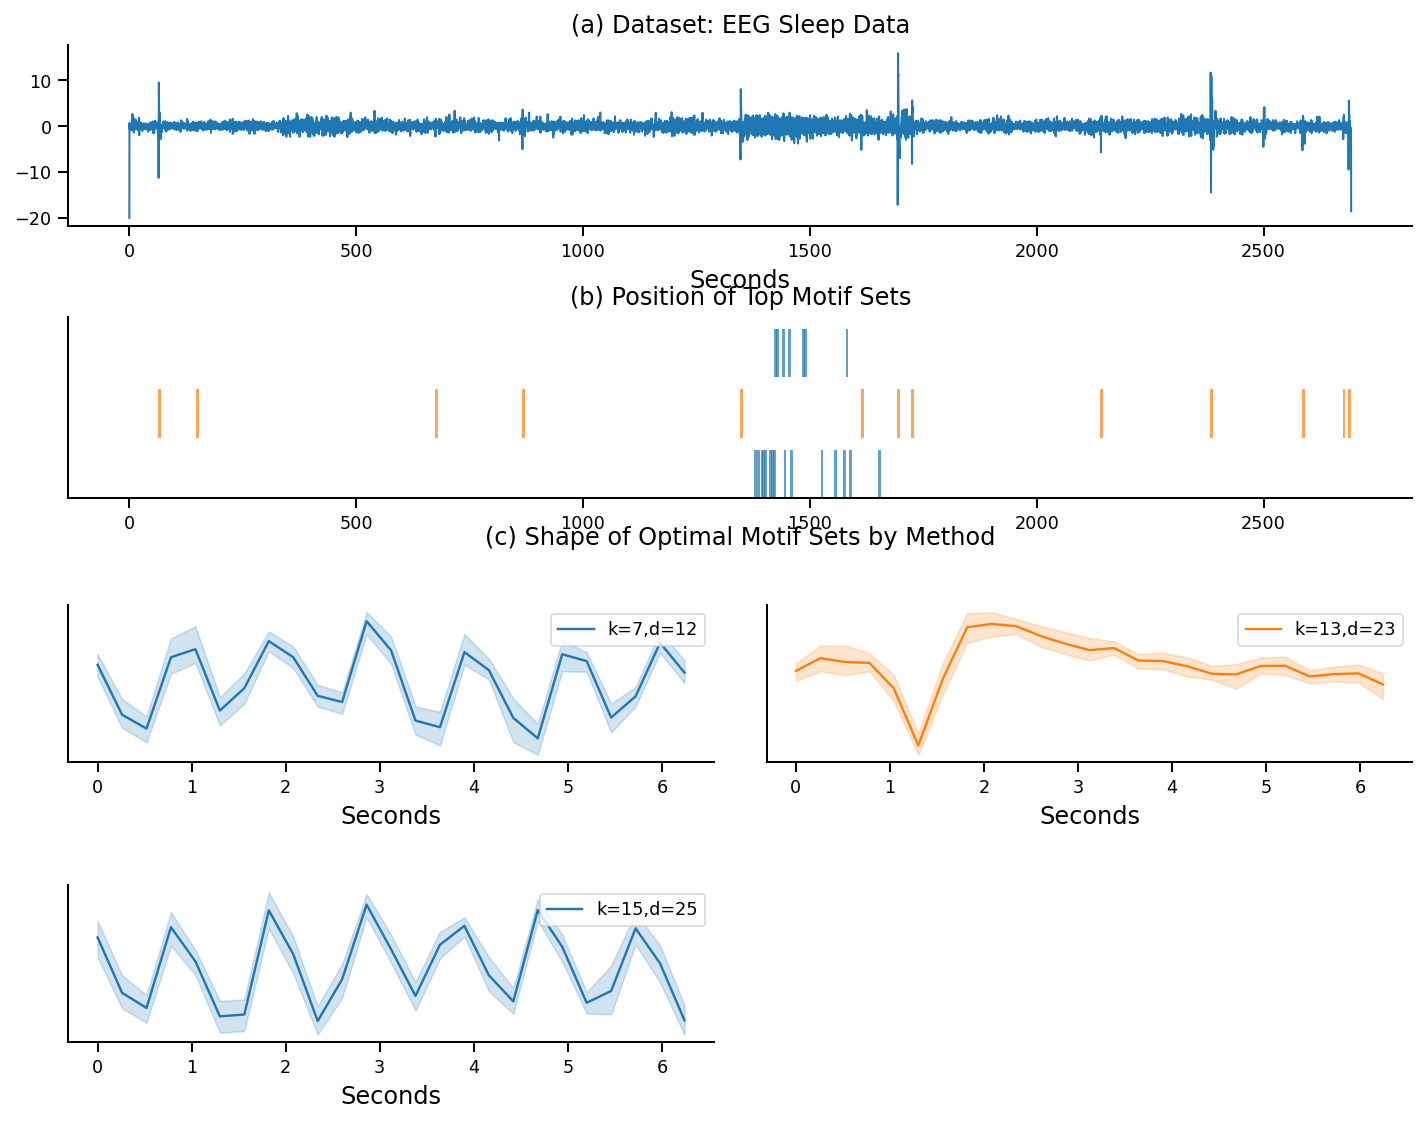

In [11]:
dists, candidates, elbow_points = plot_elbow(
    ks, series,
    motif_length=motif_length, ds_name=ds_name)

<hr>

# Dataset: Winding

Industrial Winding Process is a snapshot of a process where a plastic web is unwound from a first reel (unwinding reel), goes over the second traction reel and is finally rewound on the the third rewinding reel. The recordings correspond to the traction of the second reel angular speed. The data contains $2.500$ points sampled at $0.1s$, corresponding to $250s$.

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

Dataset Original Length n:  2499
Dataset Sampled Length n:  2499


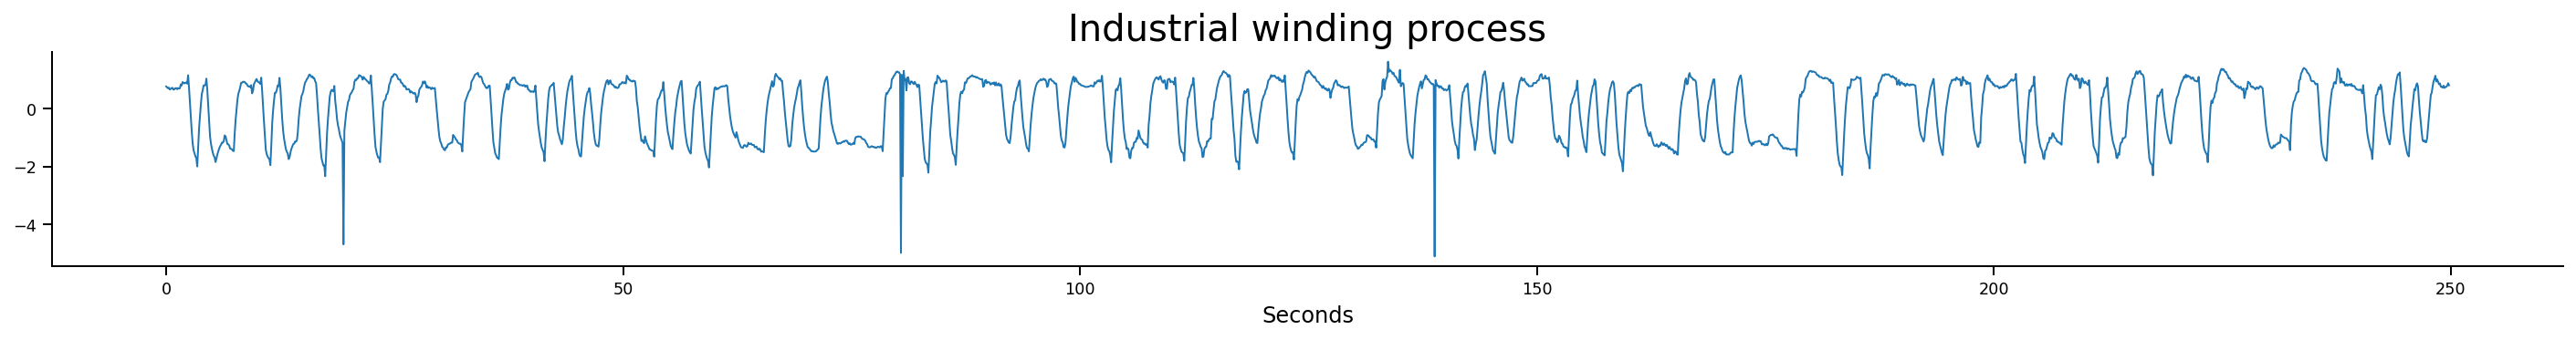

In [12]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = ml.read_dataset_with_index(file)
plot_dataset(ds_name, series)

# Known Motifs

 No documented motifs exist.

## First, we learn the motif length l

We find aminimum around $l=6s$, equal to 60 data points.

Compute ks: 100%|███████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 194.50it/s]


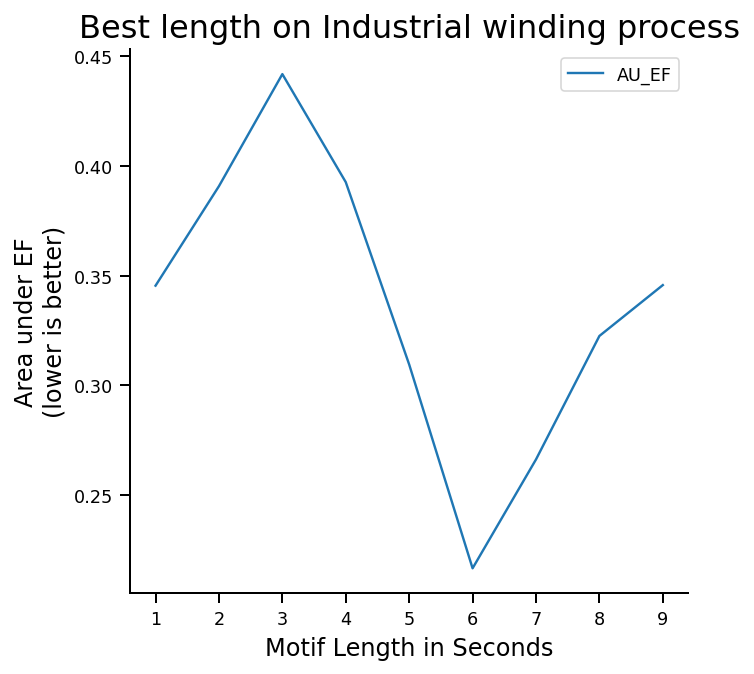

In [13]:
ks = 12
length_range = np.arange(10,100,10)

motif_length = plot_motif_length_selection(
    ks, series, motif_length_range=length_range, ds_name=ds_name)

# Top-1 Motiflets

Compute ks: 100%|████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 78.07it/s]


Chosen window-size: 60
Elbow Points [ 6 10]


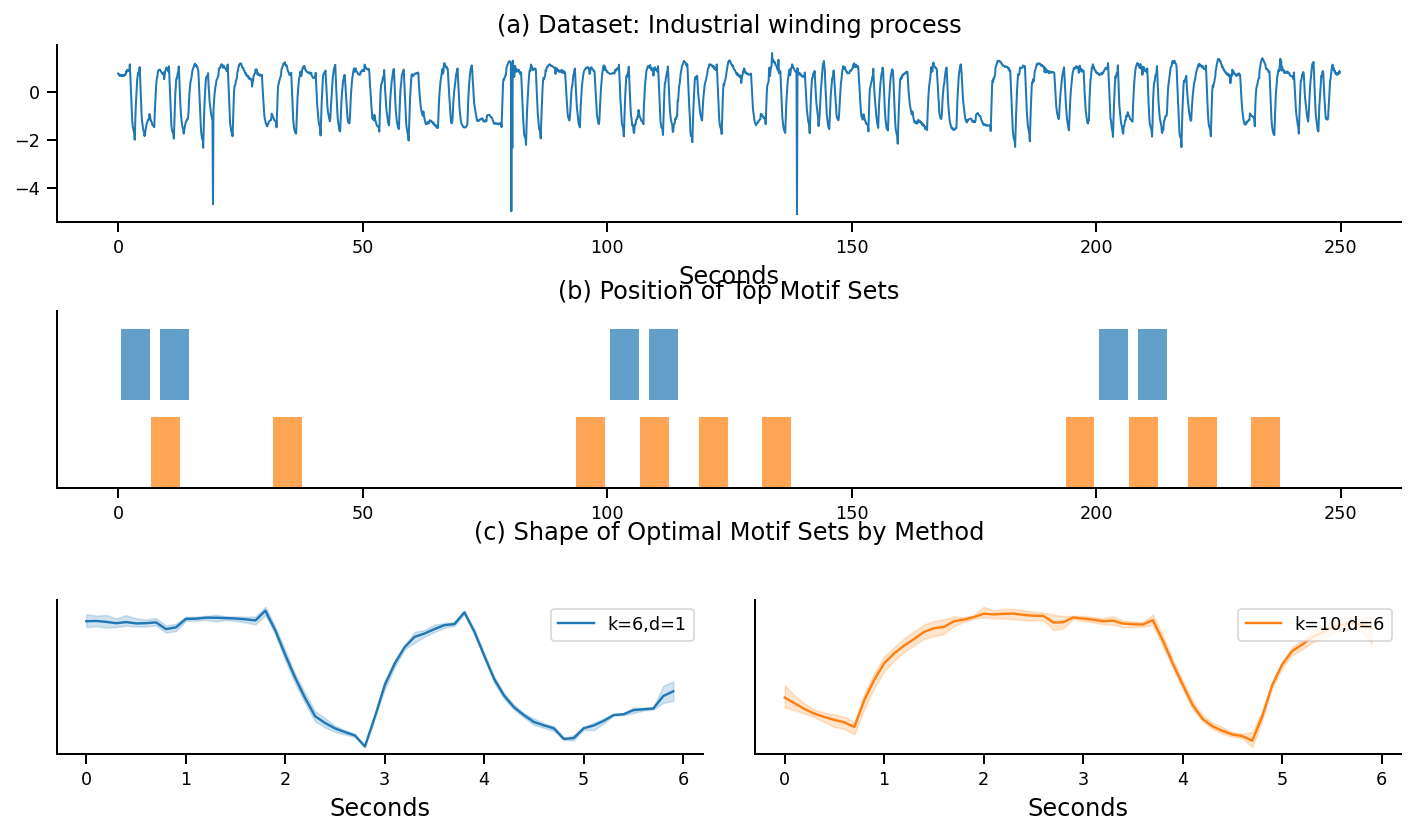

In [14]:
dists, candidates, elbow_points = plot_elbow(
    ks, series,
    motif_length=motif_length, ds_name=ds_name)

# Top-2 Motiflet

Compute ks: 100%|████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.94it/s]


Chosen window-size: 60
Elbow Points [3 5 8]


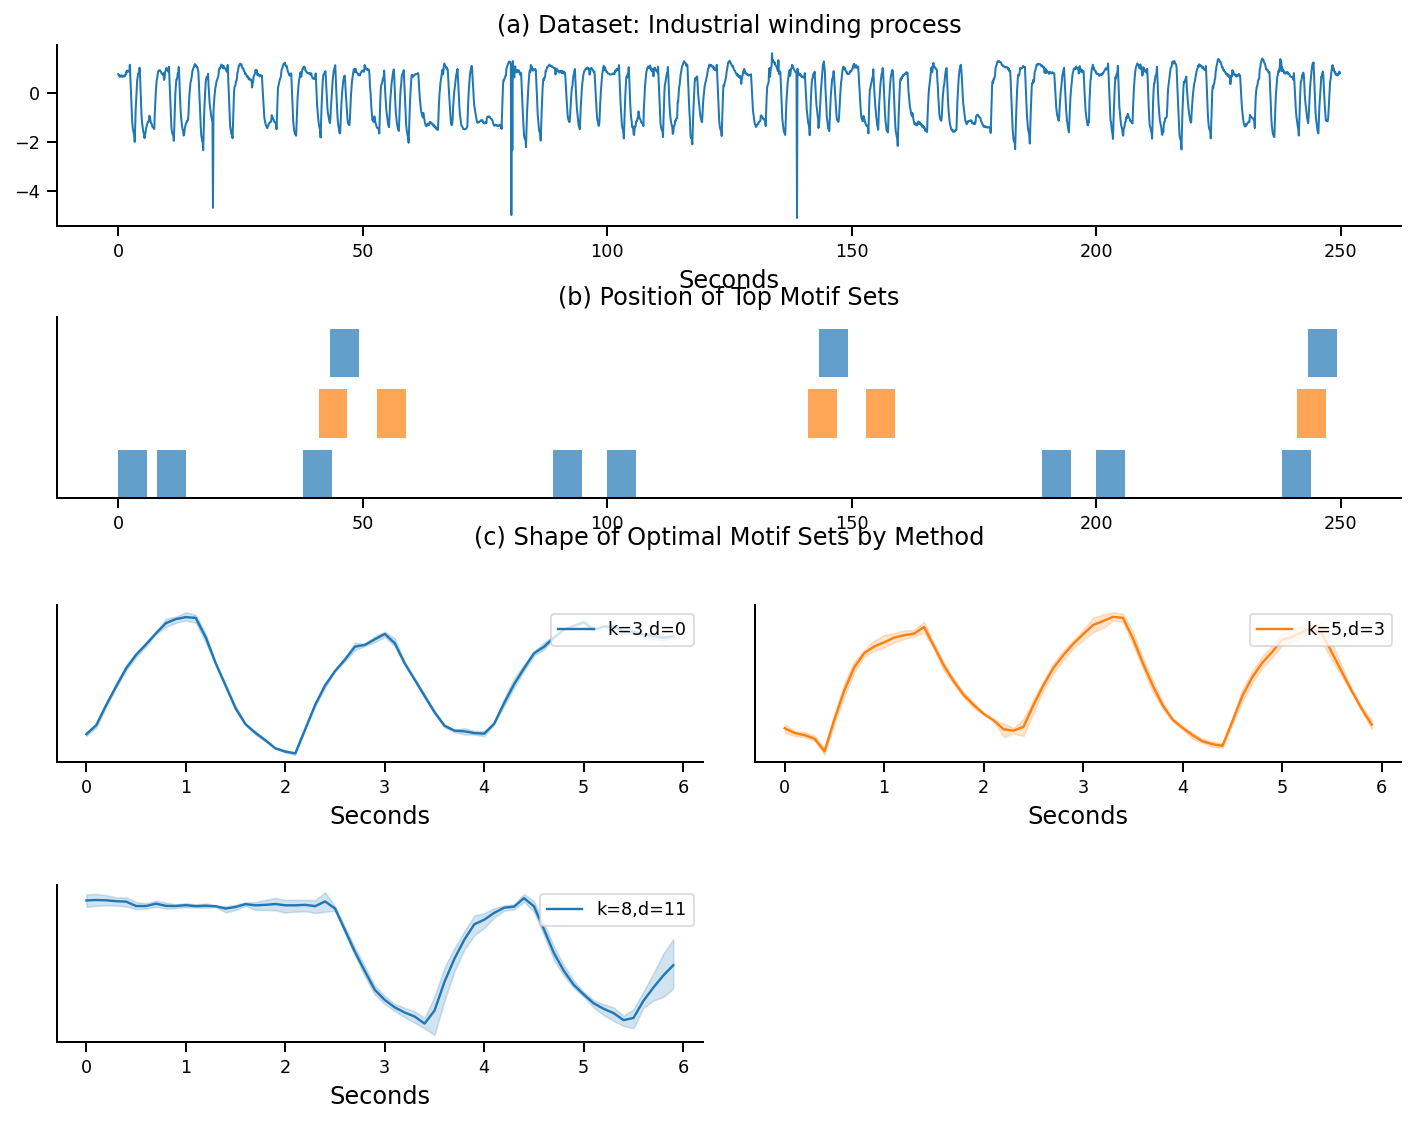

In [15]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, motif_length=motif_length,
    exclusion=candidates, ds_name=ds_name)

<hr>

# Dataset: fNIRS Brain Imaging

Functional near-infrared spectroscopy (fNIRS) contains brain imaginary data recorded at $690nm$ intensity. There are $208.028$ measurements in total. The data is known to be a difficult example, as it contains four motion artifacts, due to movements of the patient, which dominate MD.

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

## Motif Length Selection

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 30.67it/s]


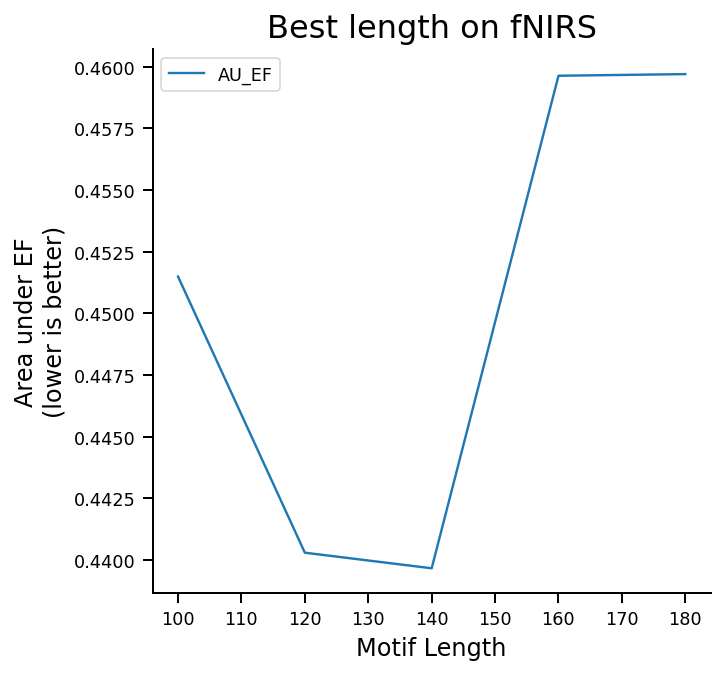

Found motif length 140


In [17]:
ks = 20
length_range = np.arange(100,200,20)
motif_length = plot_motif_length_selection(
    ks, series, motif_length_range=length_range,
    ds_name=ds_name)

print ("Found motif length", series.index[motif_length])

# Top k-Motiflets

Compute ks: 100%|████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 11.31it/s]


Chosen window-size: 140
Elbow Points [ 4 18]


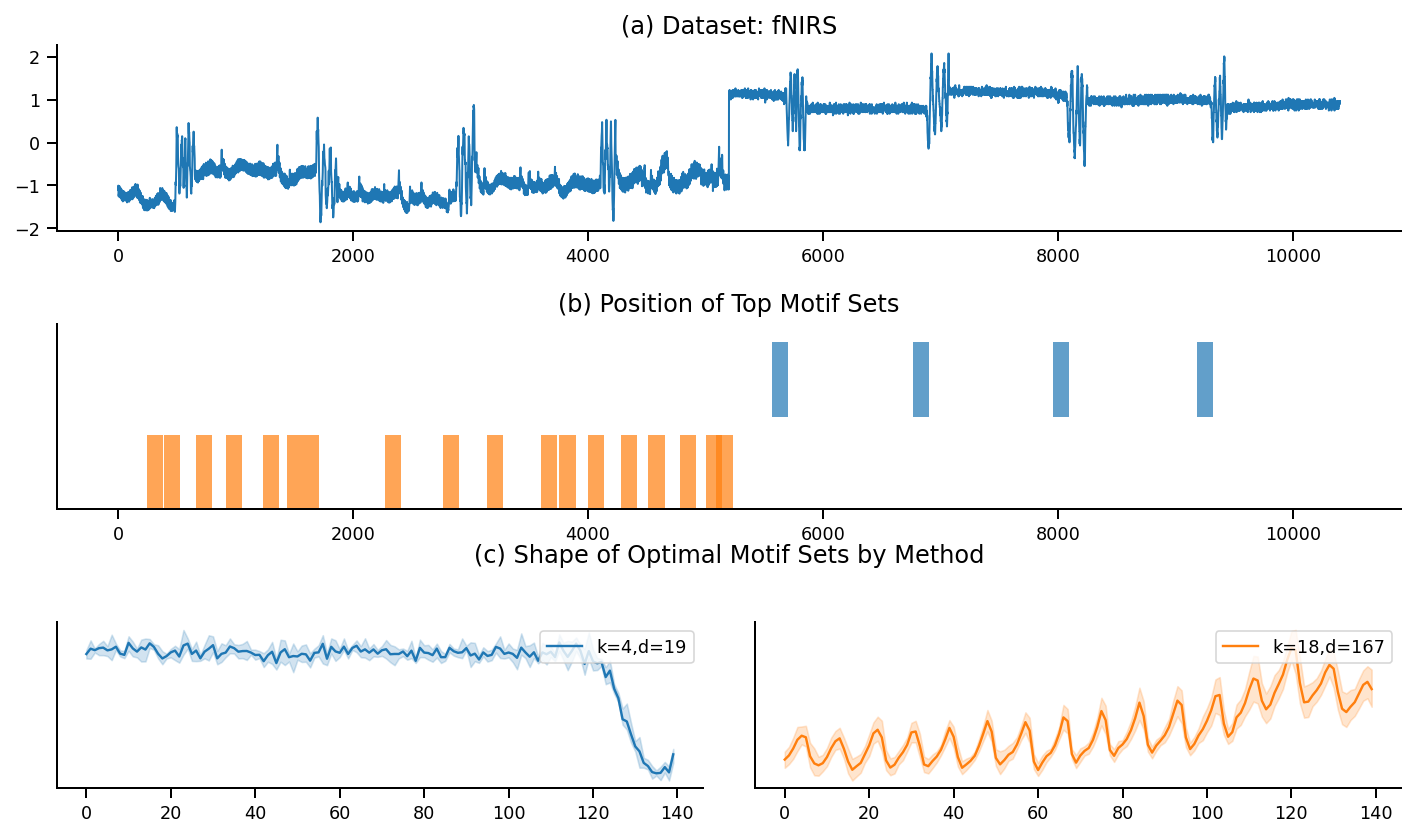

In [18]:
dists, candidates, elbow_points = plot_elbow(
    ks, series,
    motif_length=motif_length, ds_name=ds_name, filter=True)